In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [88]:
3*2**2

12

In [17]:
#Create a function for sobel filter:
def sobel(image):
  '''Takes an array of gray scale image and returns an array of sobel filtered image
  Here, Gx and Gy are the tensor metrix/kernels that performs the edge operations.'''
  Gx = np.array([[1, 0, -1],
                 [2, 0, -2],
                 [1, 0, -1]])
  Gy = np.array([[1, 2, 1],
                 [0, 0, 0],
                 [-1, -2, -1]])
  H,W = np.shape(image)
  filtered_image = np.zeros(shape=(H,W))

  for i in range(H-2):
    for j in range(W-2):
      Gx_A = np.sum(np.multiply(Gx, image[i:i+3, j:j+3])) #slides over x-axis(along with horizontal/columns/width) first inside of 'j' loop and then in height i.e. in y-axis and perform operation for first (3x3) kernel tensor
      Gy_A = np.sum(np.multiply(Gy, image[i:i+3, j:j+3])) #same as previous but for next kernel tensor.
      filtered_image[i+1, j+1] = np.sqrt(Gx_A**2+Gy_A**2) #Calculates the hypotenus of Gx_A and Gy_A

  return filtered_image


In [64]:
def read_and_convert(image_path:str,
                     r_constant=0.2126,
                     g_constant=0.7152,
                     b_constant=0.0722,
                     gamma = 1.400):
  '''This function reads the rgb image from given path and convert that image into
  grayscale image
  To convert into grayscale we require some parameters such as:
  gamma = 1.400 and
  weights for RGB components i.e. r-constant, g-constant, b-constant = 0.2126, 0.7152, 0.0722'''
  image = cv.imread(image_path)
  #convert the RGB image into grayscale image.

  r_channel, g_channel, b_channel = image[:, :, 0], image[:, :, 1], image[:, :, 2]

  grayscale_image = r_constant*r_channel**gamma + g_constant*g_channel**gamma + b_constant*b_channel**gamma
  return grayscale_image



#From the images shown in cell below, we can see that for different values of parameters, converted grayscaled image looks different as we can see in the second grayscaled image for weights of r_channel =1, the color of box is very dark as compared to other grayscaled image as in original image only the box contains more red color.  

In [65]:
gray_image_default = read_and_convert("/content/box.jpg")

In [82]:
gray_image_1 = read_and_convert("/content/box.jpg",r_constant=1)

In [80]:
gray_image_2 = read_and_convert("/content/box.jpg",r_constant=1, g_constant=1, b_constant=1,gamma=1.5)

In [68]:
print(f"The shape of the converted grayscale image from rgb image: {gray_image_default.shape}")

The shape of the converted grayscale image from rgb image: (1080, 1000)


In [69]:
RGB_image = cv.imread("/content/box.jpg")

In [70]:
print(f"The shape of rgb image read from given path: {RGB_image.shape}")

The shape of rgb image read from given path: (1080, 1000, 3)


(-0.5, 999.5, 1079.5, -0.5)

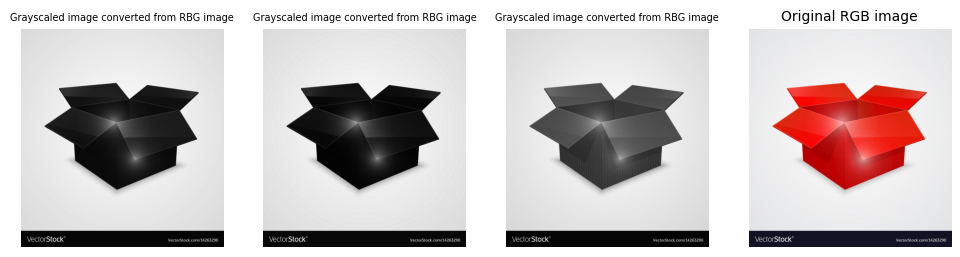

In [85]:
#Plotting grayscale image and its original image by varying the parameters values to see the difference in converted grayscaled image.
plt.figure(figsize=(12,12))
plt.subplot(1,4,1)
plt.imshow(gray_image_default, cmap='gray')
plt.title("Grayscaled image converted from RBG image",fontsize=7)
plt.axis(False)
plt.subplot(1,4,2)
plt.imshow(gray_image_1, cmap='gray')
plt.title("Grayscaled image converted from RBG image",fontsize=7)
plt.axis(False)
plt.subplot(1,4,3)
plt.imshow(gray_image_2, cmap='gray')
plt.title("Grayscaled image converted from RBG image",fontsize=7)
plt.axis(False)
plt.subplot(1,4,4)
plt.imshow(cv.cvtColor(RGB_image, cv.COLOR_BGR2RGB))
plt.title("Original RGB image",fontsize=10)
plt.axis(False)

#The cell below plots the converted grayscaled image and the image after edge detection using Sobel filter.

In [57]:
#Create a function to plot the grayscale image and the image after sobel filter.
def plot(gray_image, sobel_image):
  plt.figure(figsize=(12,12))
  plt.subplot(1,2,1)
  plt.imshow(gray_image, cmap='gray')
  plt.title("Grayscaled image converted from RBG image")
  plt.axis(False)
  plt.subplot(1,2,2)
  plt.imshow(sobel_image)
  plt.title("Edge Detected image from Sobel filter")
  plt.axis(False)

In [58]:
sobel_filtered_image = sobel(gray_image_default)# used grayscaled image converted from rgb image where default/standard values for conversion were used.

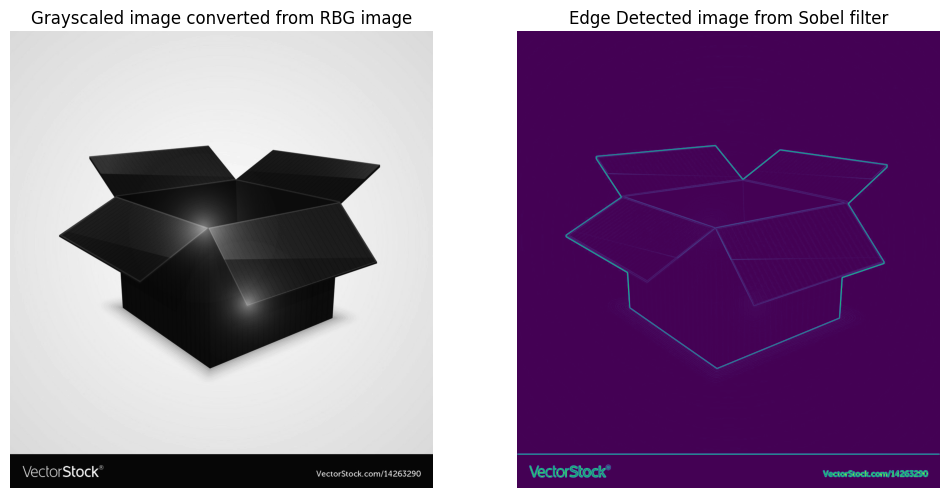

In [59]:
plot(gray_image_default, sobel_filtered_image)